<a href="https://colab.research.google.com/github/tohnperfect/KKU_Data_Mining/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [3]:
X.shape

(300, 2)

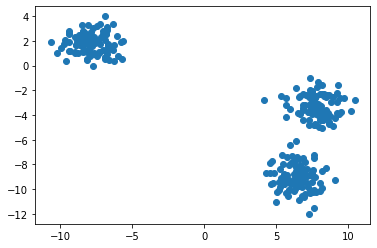

In [4]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

## Import

In [5]:
from sklearn.cluster import KMeans

## Define

In [10]:
KMclust = KMeans(n_clusters=5)

## Train

In [11]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Predict

In [12]:
label = KMclust.predict(X)

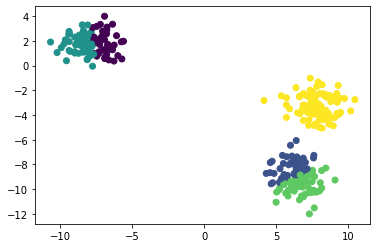

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=label)

# Color quantization (application of kmean)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive'

Mounted at /content/drive


In [17]:
import cv2
import os

In [27]:
img = cv2.imread(os.path.join(path,'83ba3efb63eb0ad83223a2156a567da9.jpg'))

In [40]:
img

array([[[  0,  14,   0],
        [  0,  14,   0],
        [  0,  14,   0],
        ...,
        [ 18,  84,  12],
        [ 18,  84,  12],
        [ 18,  84,  12]],

       [[  0,  14,   0],
        [  0,  14,   0],
        [  0,  14,   0],
        ...,
        [ 18,  84,  12],
        [ 19,  85,  13],
        [ 19,  85,  13]],

       [[  0,  14,   0],
        [  0,  14,   0],
        [  0,  14,   0],
        ...,
        [ 19,  85,  13],
        [ 20,  86,  14],
        [ 20,  86,  14]],

       ...,

       [[ 79,  85, 114],
        [ 83,  89, 118],
        [ 89,  95, 124],
        ...,
        [133, 141, 158],
        [124, 132, 149],
        [134, 141, 158]],

       [[ 53,  60,  87],
        [ 60,  67,  94],
        [ 71,  78, 105],
        ...,
        [135, 142, 159],
        [126, 133, 150],
        [136, 143, 160]],

       [[ 23,  30,  57],
        [ 25,  32,  59],
        [ 29,  36,  63],
        ...,
        [137, 144, 161],
        [128, 135, 152],
        [137, 144, 161]]

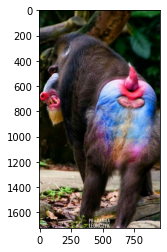

In [28]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [29]:
RGB_img.shape

(1724, 959, 3)

## count unique colors

In [30]:
import numpy as np

In [32]:
np.unique(RGB_img).shape

(256,)

## Use K-mean to reduce color from 256 colors to 8 colors

In [34]:
#Define
myQuantize = KMeans(n_clusters=8)

In [41]:
img_row = np.reshape(RGB_img,(1724*959,3))
img_row

array([[  0,  14,   0],
       [  0,  14,   0],
       [  0,  14,   0],
       ...,
       [161, 144, 137],
       [152, 135, 128],
       [161, 144, 137]], dtype=uint8)

In [42]:
#Train
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
#Predict
res = myQuantize.predict(img_row)

In [44]:
res

array([3, 3, 3, ..., 5, 5, 5], dtype=int32)

## Get cluster centers

In [45]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[134.32750033, 164.79165452, 217.31898265],
       [ 49.04291915,  41.22327141,  28.8751184 ],
       [128.15964528,  95.44450412,  92.31407953],
       [ 11.60150223,  15.17556631,   5.46875956],
       [214.79911431, 198.17987899, 195.49754246],
       [181.31583456, 139.58671047, 135.7636448 ],
       [ 74.43934131, 110.32459407, 184.12554402],
       [ 80.92298713,  67.24195559,  61.62974833]])

In [46]:
Clus_cen.shape

(8, 3)

## Map color back to the image

In [48]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [49]:
new_img_ = new_img/255

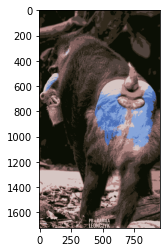

In [50]:
plt.imshow(new_img_)